# Simulating L-I Measurements Curve

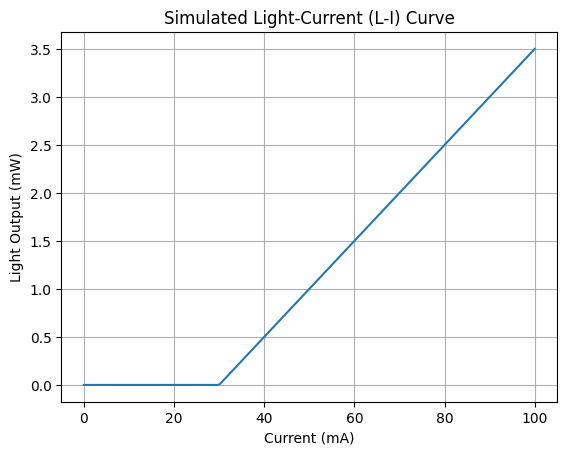

In [1]:
import numpy as np
import matplotlib.pyplot as plt

I = np.linspace(0, 100, 200)  # Current from 0 to 100 mA
I_th = 30                     # Threshold current
eta = 0.05                    # Efficiency
L = np.maximum(0, eta * (I - I_th))  # Light output

plt.plot(I, L)
plt.xlabel("Current (mA)")
plt.ylabel("Light Output (mW)")
plt.title("Simulated Light-Current (L-I) Curve")
plt.grid(True)
plt.show()

# Simulating L–I–V–T Characteristics

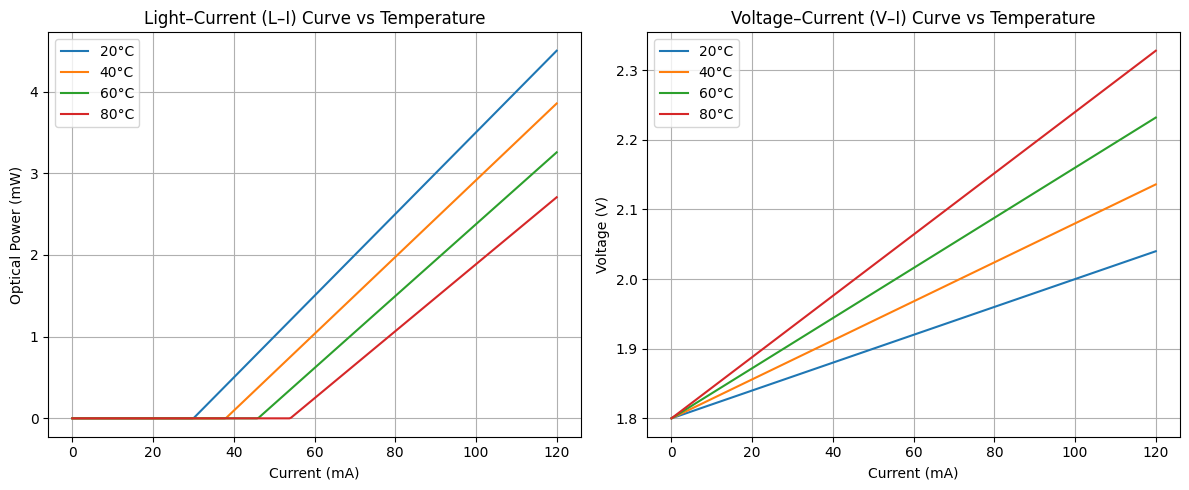

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define current range (mA)
I = np.linspace(0, 120, 300)

# Define temperatures in °C
temperatures = [20, 40, 60, 80]

# Base parameters at 20°C
I_th0 = 30         # threshold current (mA)
eta0 = 0.05        # optical efficiency (mW/mA)
V0 = 1.8           # forward voltage at low current (V)
R_int0 = 2         # internal resistance (ohms)

# Temperature coefficients
k_Ith = 0.4        # threshold current increase per °C (mA/°C)
k_eta = 0.003      # efficiency drop per °C
k_R = 0.02         # resistance increase per °C (Ω/°C)

# Plot L-I and V-I curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for T in temperatures:
    # Temperature-dependent parameters
    I_th = I_th0 + k_Ith * (T - 20)
    eta = eta0 * (1 - k_eta * (T - 20))
    R_int = R_int0 * (1 + k_R * (T - 20))
    
    # Light output (L)
    L = np.maximum(0, eta * (I - I_th))  # light only after threshold
    
    # Voltage (V)
    V = V0 + (I * 1e-3) * R_int          # ohmic voltage rise (A × Ω)
    
    # Plot curves
    ax1.plot(I, L, label=f"{T}°C")
    ax2.plot(I, V, label=f"{T}°C")

# L-I curve
ax1.set_title("Light–Current (L–I) Curve vs Temperature")
ax1.set_xlabel("Current (mA)")
ax1.set_ylabel("Optical Power (mW)")
ax1.grid(True)
ax1.legend()

# V-I curve
ax2.set_title("Voltage–Current (V–I) Curve vs Temperature")
ax2.set_xlabel("Current (mA)")
ax2.set_ylabel("Voltage (V)")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


# Simulating L–I–V–T Characteristics Against Temperature

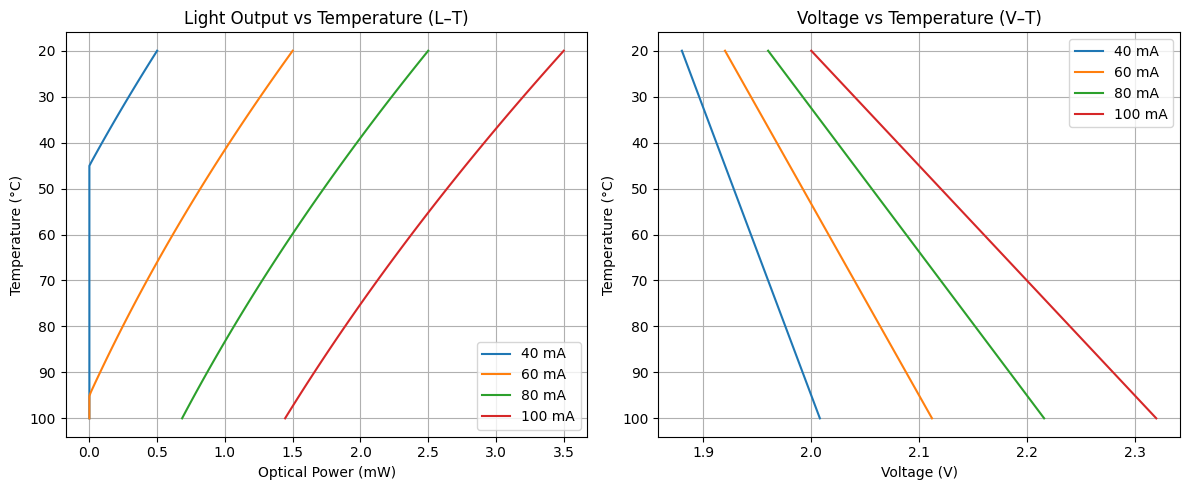

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Temperature range (°C)
T = np.linspace(20, 100, 100)

# Fixed drive currents (mA)
currents = [40, 60, 80, 100]

# Base parameters at 20°C
I_th0 = 30         # threshold current (mA)
eta0 = 0.05        # optical efficiency (mW/mA)
V0 = 1.8           # forward voltage (V)
R_int0 = 2         # internal resistance (ohms)

# Temperature coefficients
k_Ith = 0.4        # threshold current increase per °C (mA/°C)
k_eta = 0.003      # efficiency drop per °C
k_R = 0.02         # resistance increase per °C (Ω/°C)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for I in currents:
    I_th = I_th0 + k_Ith * (T - 20)
    eta = eta0 * (1 - k_eta * (T - 20))
    R_int = R_int0 * (1 + k_R * (T - 20))
    
    L = np.maximum(0, eta * (I - I_th))      # Light output
    V = V0 + (I * 1e-3) * R_int              # Voltage
    
    # Plot with temperature on Y-axis
    ax1.plot(L, T, label=f"{I} mA")
    ax2.plot(V, T, label=f"{I} mA")

# L–T (Temp on Y)
ax1.set_title("Light Output vs Temperature (L–T)")
ax1.set_xlabel("Optical Power (mW)")
ax1.set_ylabel("Temperature (°C)")
ax1.invert_yaxis()  # optional, makes 'hotter' go downward like a thermometer
ax1.grid(True)
ax1.legend()

# V–T (Temp on Y)
ax2.set_title("Voltage vs Temperature (V–T)")
ax2.set_xlabel("Voltage (V)")
ax2.set_ylabel("Temperature (°C)")
ax2.invert_yaxis()
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Thermal Rollover in Light–Current (L–I) Curve

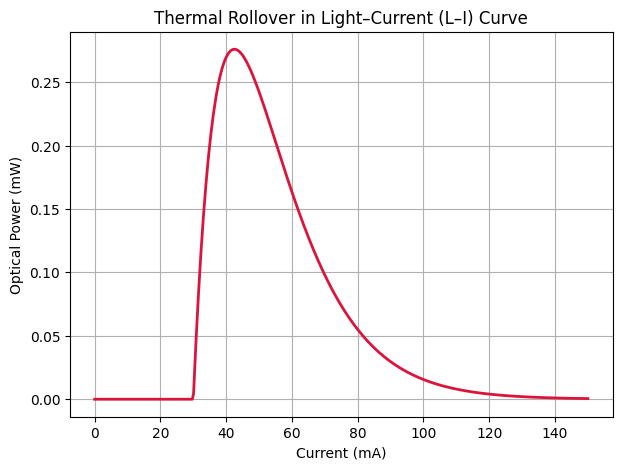

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Current range (mA)
I = np.linspace(0, 150, 400)

# Parameters
I_th = 30           # threshold current (mA)
eta0 = 0.06         # base efficiency (mW/mA)
alpha = 0.08      # thermal droop factor (reduces efficiency at high current)

# Light output (with thermal rollover)
# Efficiency drops exponentially with power dissipated
efficiency = eta0 * np.exp(-alpha * (I - I_th))
L = np.maximum(0, efficiency * (I - I_th))

plt.figure(figsize=(7,5))
plt.plot(I, L, color="crimson", linewidth=2)
plt.title("Thermal Rollover in Light–Current (L–I) Curve")
plt.xlabel("Current (mA)")
plt.ylabel("Optical Power (mW)")
plt.grid(True)
plt.show()


# Nonlinear Diode Voltage–Current (V–I) Curve

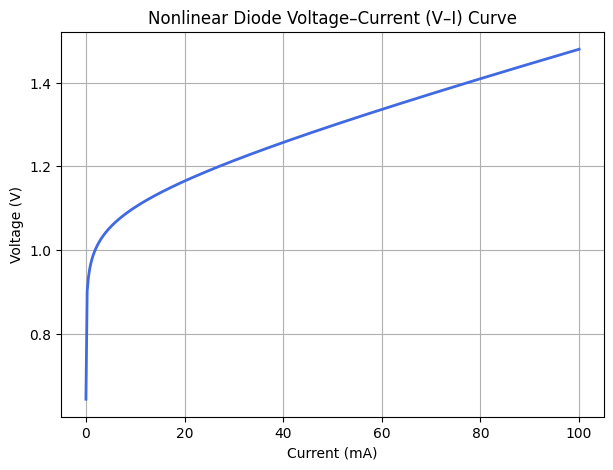

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Current range (mA)
I = np.linspace(0.001, 100, 400) * 1e-3  # Convert mA to A

# Constants
n = 1.8                 # ideality factor
k = 1.38e-23            # Boltzmann constant (J/K)
q = 1.6e-19             # electron charge (C)
T = 300                 # temperature (K)
Is = 1e-12              # saturation current (A)
R_series = 3            # series resistance (ohms)

# Voltage from diode equation + resistive drop
V_diode = (n * k * T / q) * np.log((I / Is) + 1)
V_total = V_diode + I * R_series

plt.figure(figsize=(7,5))
plt.plot(I * 1e3, V_total, color="royalblue", linewidth=2)
plt.title("Nonlinear Diode Voltage–Current (V–I) Curve")
plt.xlabel("Current (mA)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.show()

# Python Code: Combined L–I and V–I Curves

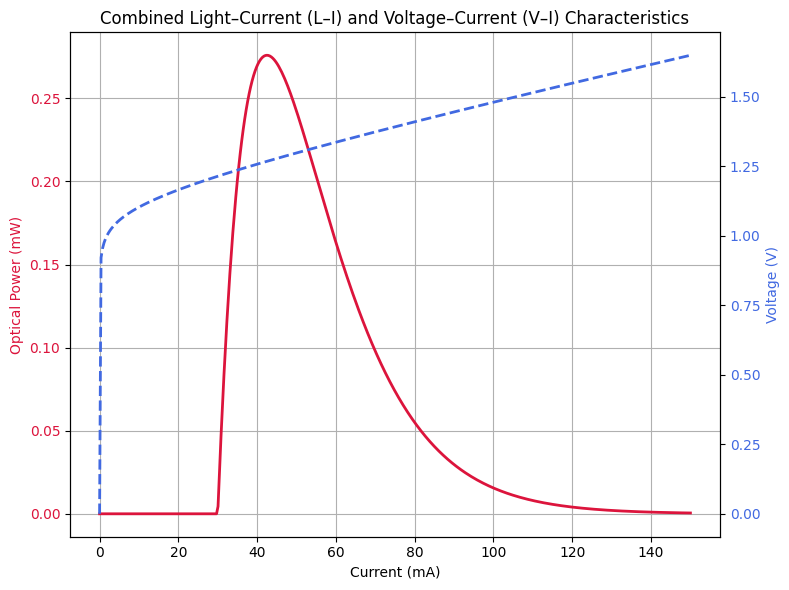

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Current range (mA)
I = np.linspace(0, 150, 400)
I_A = I * 1e-3  # Convert mA to A

# ===== Light–Current Parameters =====
I_th = 30           # threshold current (mA)
eta0 = 0.06         # base efficiency (mW/mA)
alpha = 0.0008      # droop factor (thermal rollover)
efficiency = eta0 * np.exp(-alpha * (I - I_th))
L = np.maximum(0, efficiency * (I - I_th))

# ===== Voltage–Current Parameters =====
n = 1.8             # ideality factor
k = 1.38e-23        # Boltzmann constant (J/K)
q = 1.6e-19         # electron charge (C)
T = 300             # temperature (K)
Is = 1e-12          # saturation current (A)
R_series = 3        # series resistance (ohms)
V_diode = (n * k * T / q) * np.log((I_A / Is) + 1)
V_total = V_diode + I_A * R_series

# ===== Combined Plot =====
fig, ax1 = plt.subplots(figsize=(8,6))

color1 = "crimson"
color2 = "royalblue"

# Light–Current curve
ax1.plot(I, L, color=color1, linewidth=2, label="L–I (Light Output)")
ax1.set_xlabel("Current (mA)")
ax1.set_ylabel("Optical Power (mW)", color=color1)
ax1.tick_params(axis="y", labelcolor=color1)
ax1.grid(True)

# Create twin y-axis for voltage
ax2 = ax1.twinx()
ax2.plot(I, V_total, color=color2, linewidth=2, linestyle="--", label="V–I (Voltage)")
ax2.set_ylabel("Voltage (V)", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)

# Titles and legends
plt.title("Combined Light–Current (L–I) and Voltage–Current (V–I) Characteristics")
fig.tight_layout()
plt.show()
